<a href="https://colab.research.google.com/github/danielgrgurevic/Desafios_Bootcamp_DL/blob/main/Desaf%C3%ADo_Prediciendo_los_precios_de_las_casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.- IMPORTACIÓN Y LIMPIEZA DE DATOS

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('/content/drive/MyDrive/Data science/Desafío Latam/5 - Machine Learning /Desafío 5/house_data.xlsx')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

no hay nulos ni variables categóicas por transformar

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# 2.- ANÁLISIS EXPLORATORIO DE DATOS

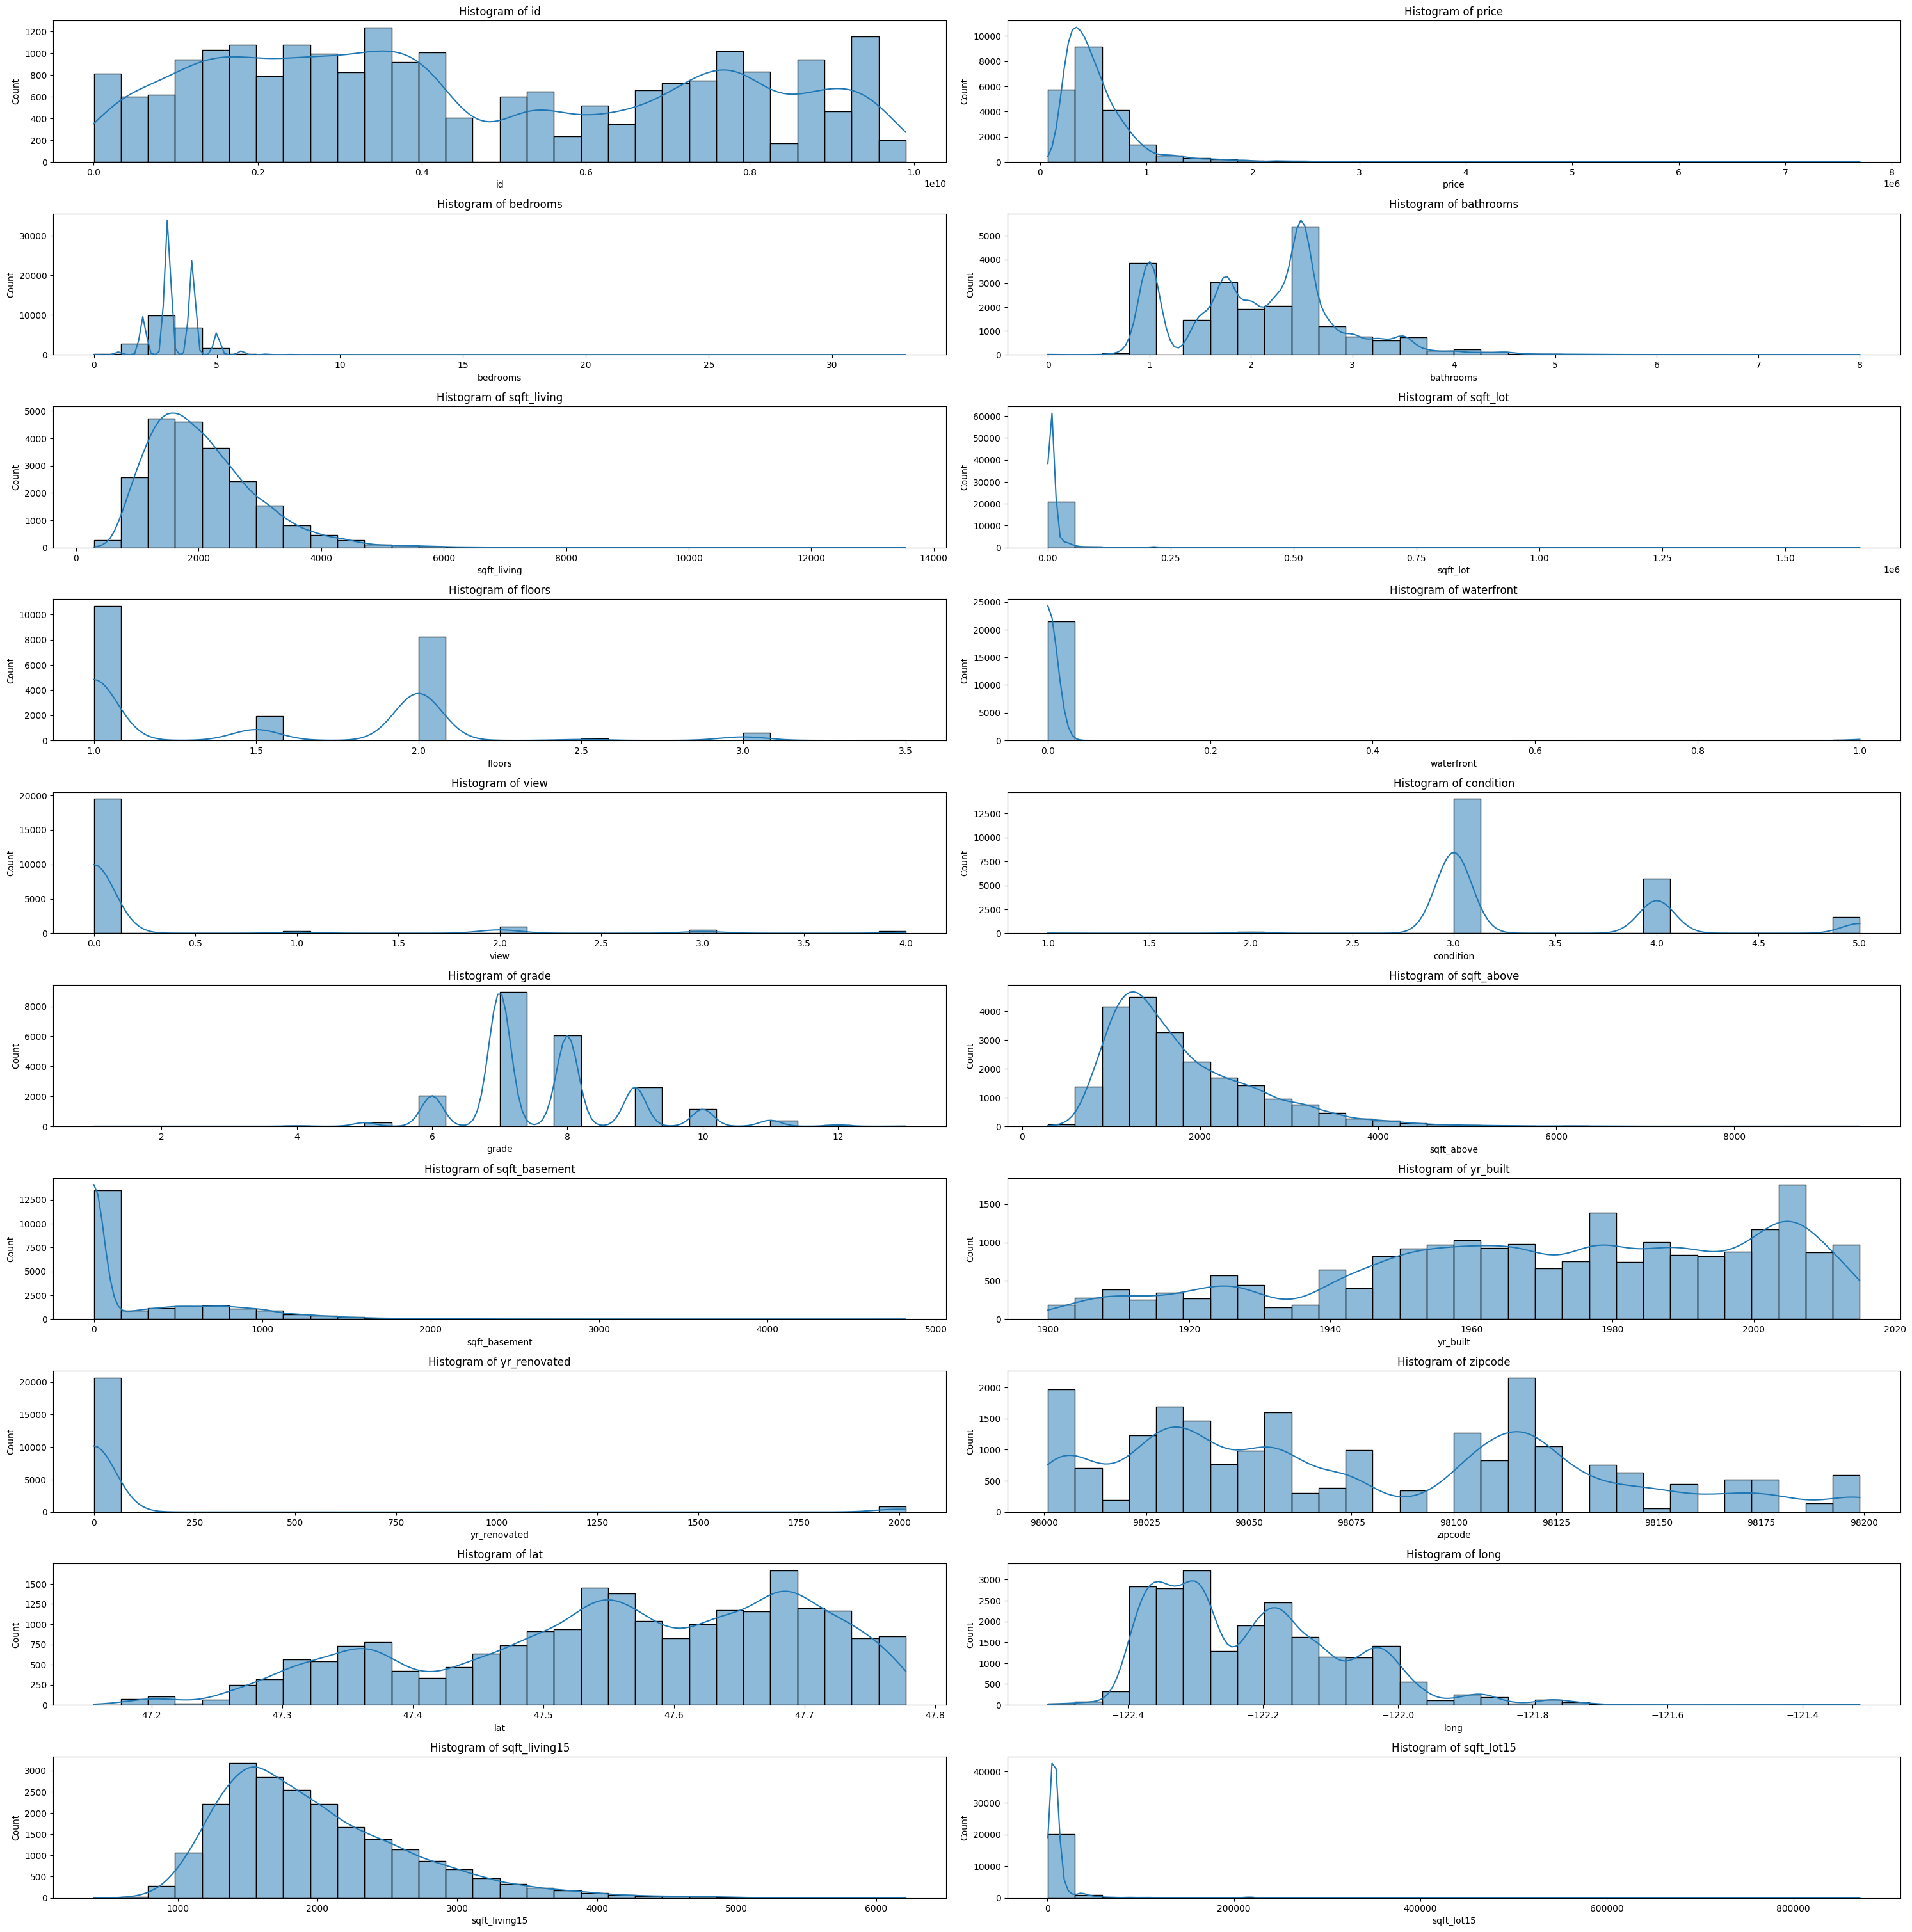

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

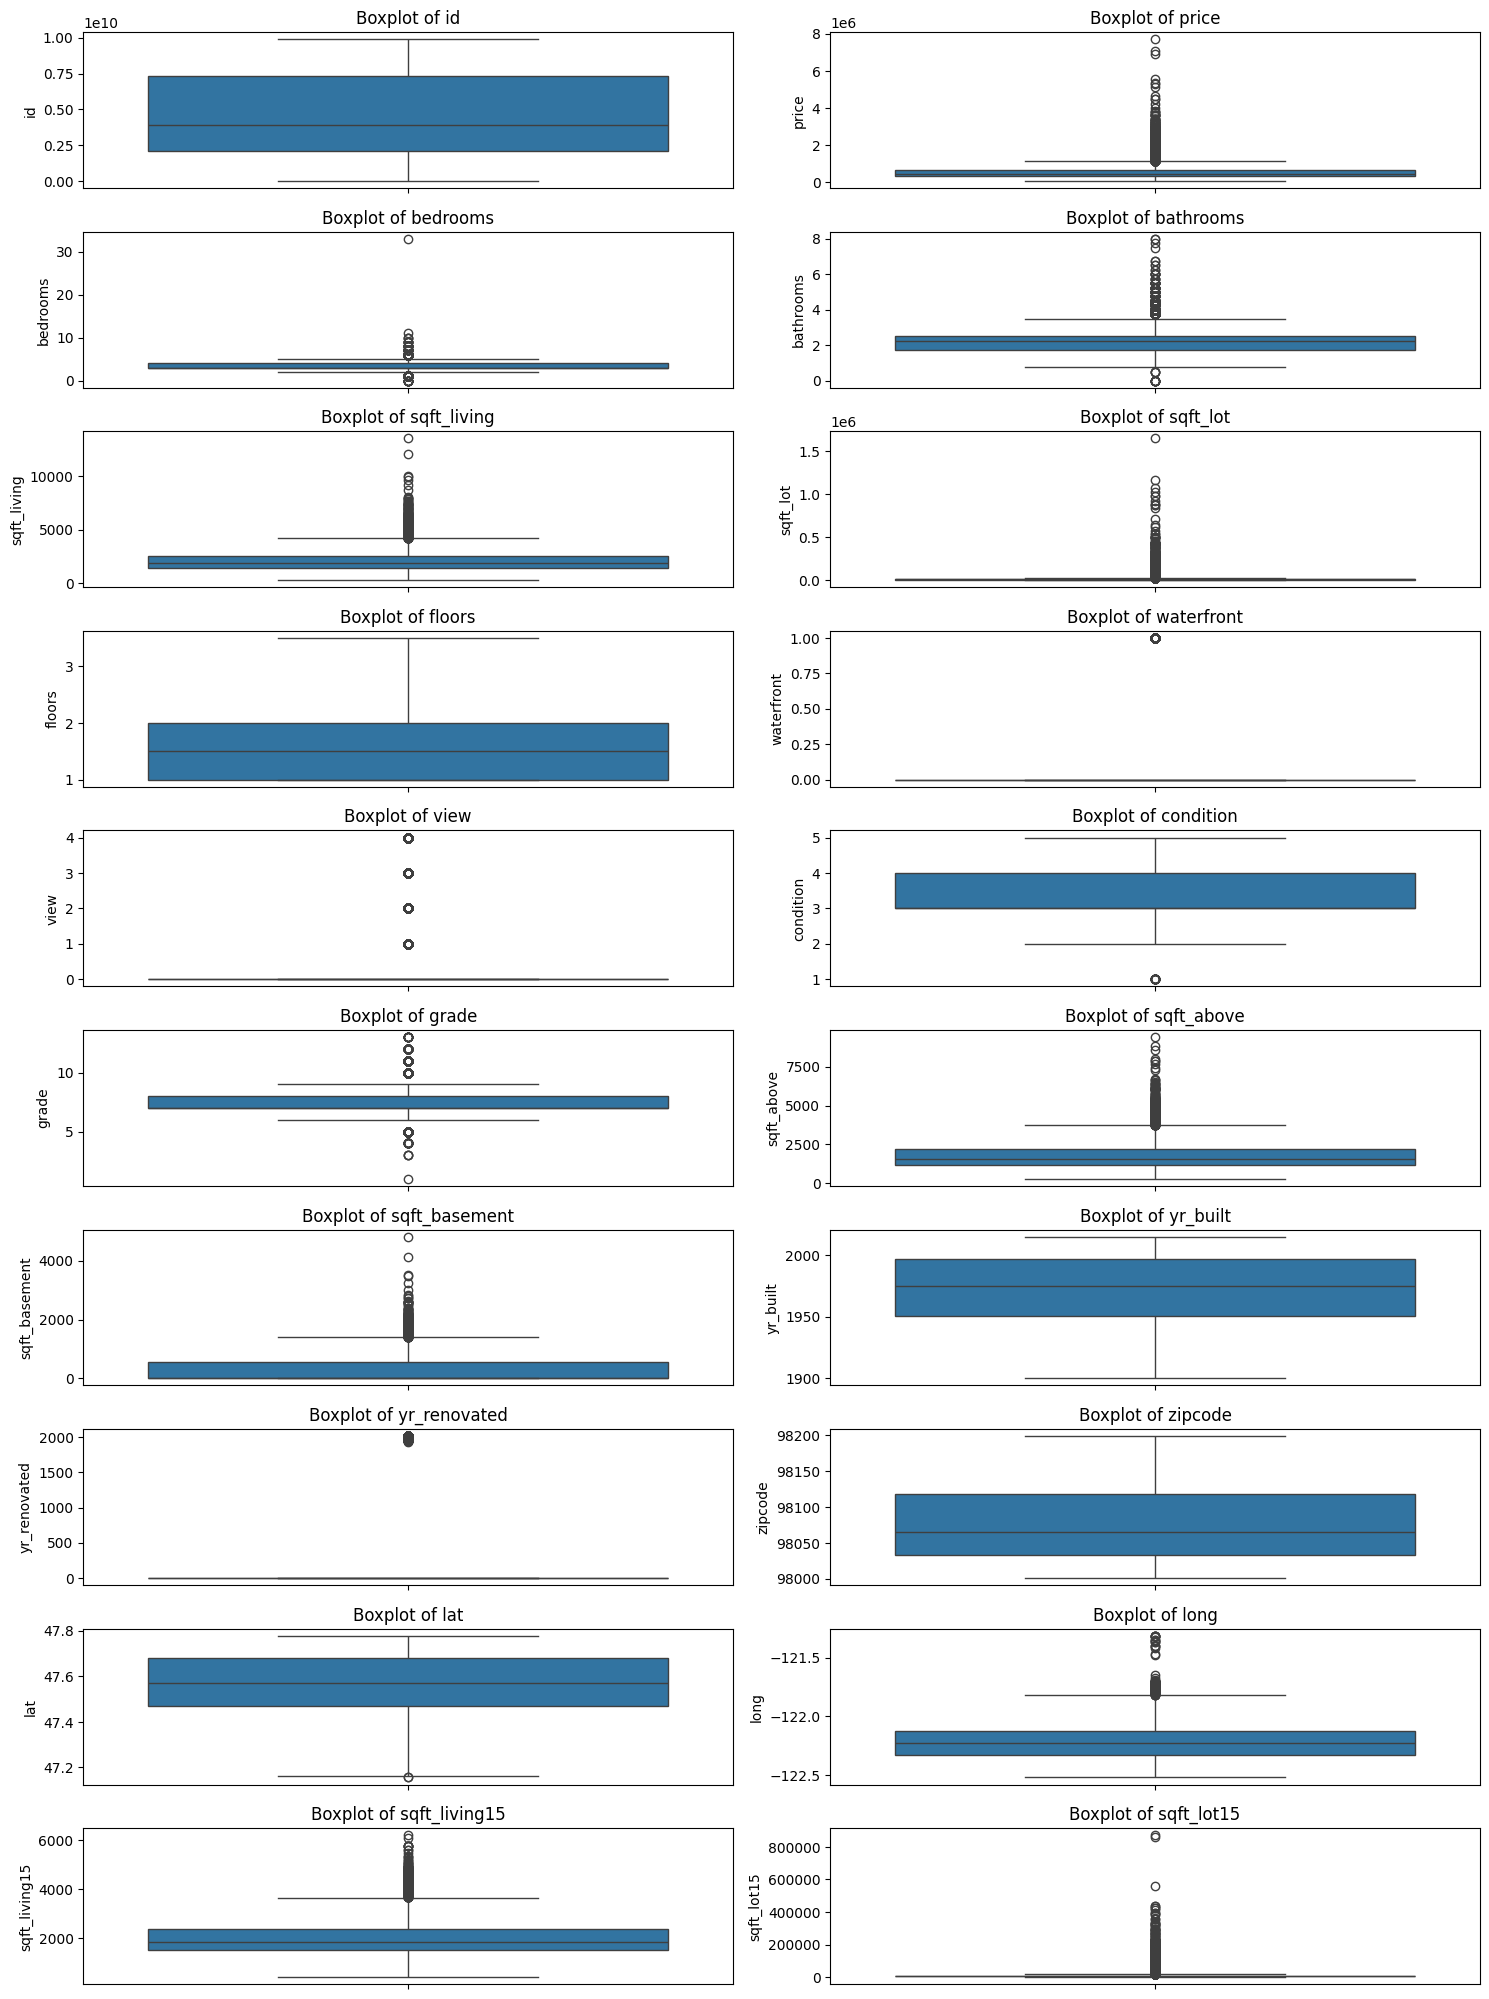

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo las columnas numéricas (excluyendo la columna 'id' y la fecha)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Crear histogramas para cada columna numérica
plt.figure(figsize=(30, 60))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 2, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

# Crear boxplots para cada columna numérica
plt.figure(figsize=(15, 40))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 2, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


In [13]:
# Eliminar las columnas 'id', 'date', y 'zipcode'
df = df.drop(columns=['id', 'date', 'zipcode'])

# Verificar que las columnas se eliminaron
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  int64  
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

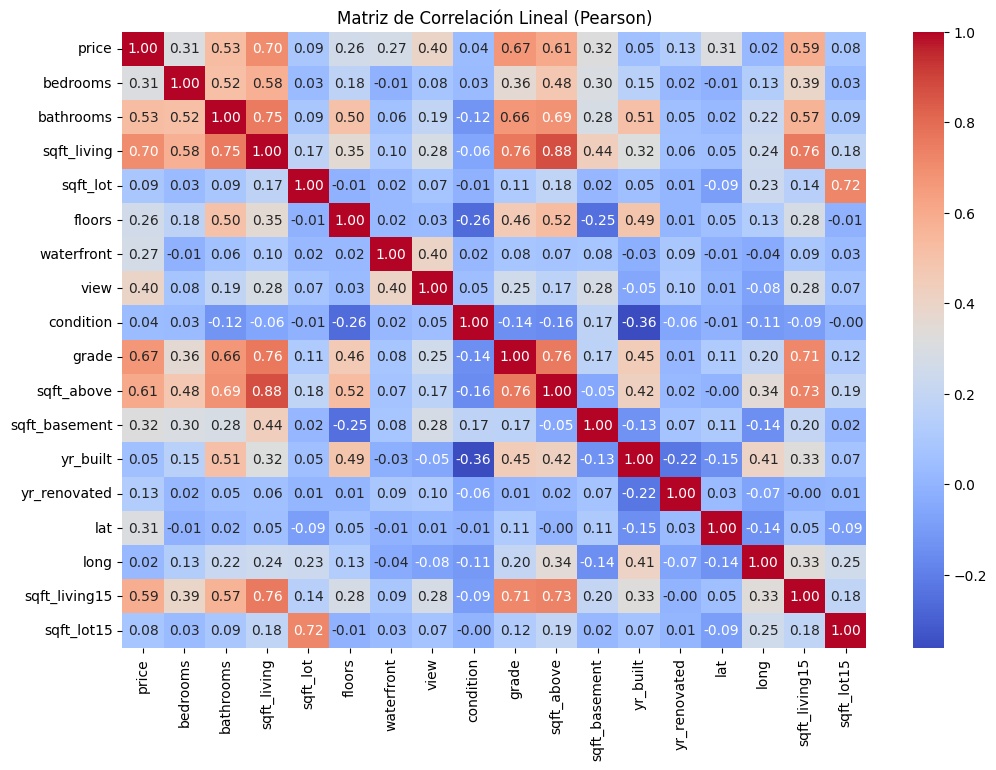

In [14]:
# Matriz de correlación lineal (Pearson)
correlation_matrix_pearson = df.corr(method='pearson')

# Visualización de la matriz de correlación lineal
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_pearson, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación Lineal (Pearson)')
plt.show()


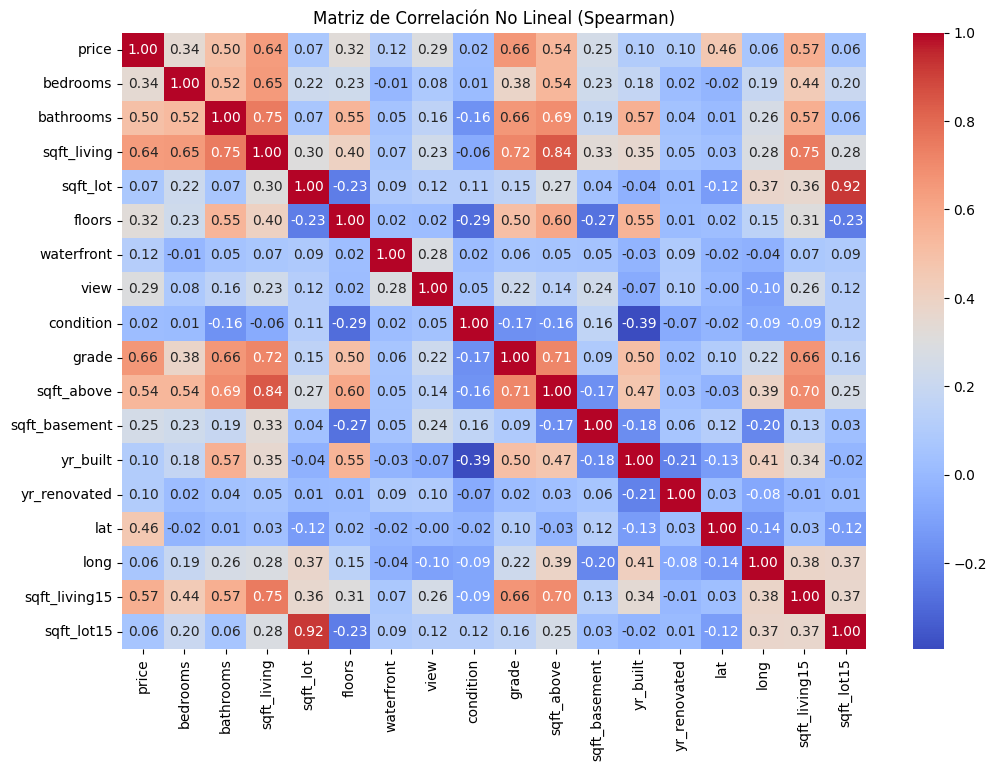

In [15]:
# Matriz de correlación no lineal (Spearman)
correlation_matrix_spearman = df.corr(method='spearman')

# Visualización de la matriz de correlación no lineal (Spearman)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación No Lineal (Spearman)')
plt.show()


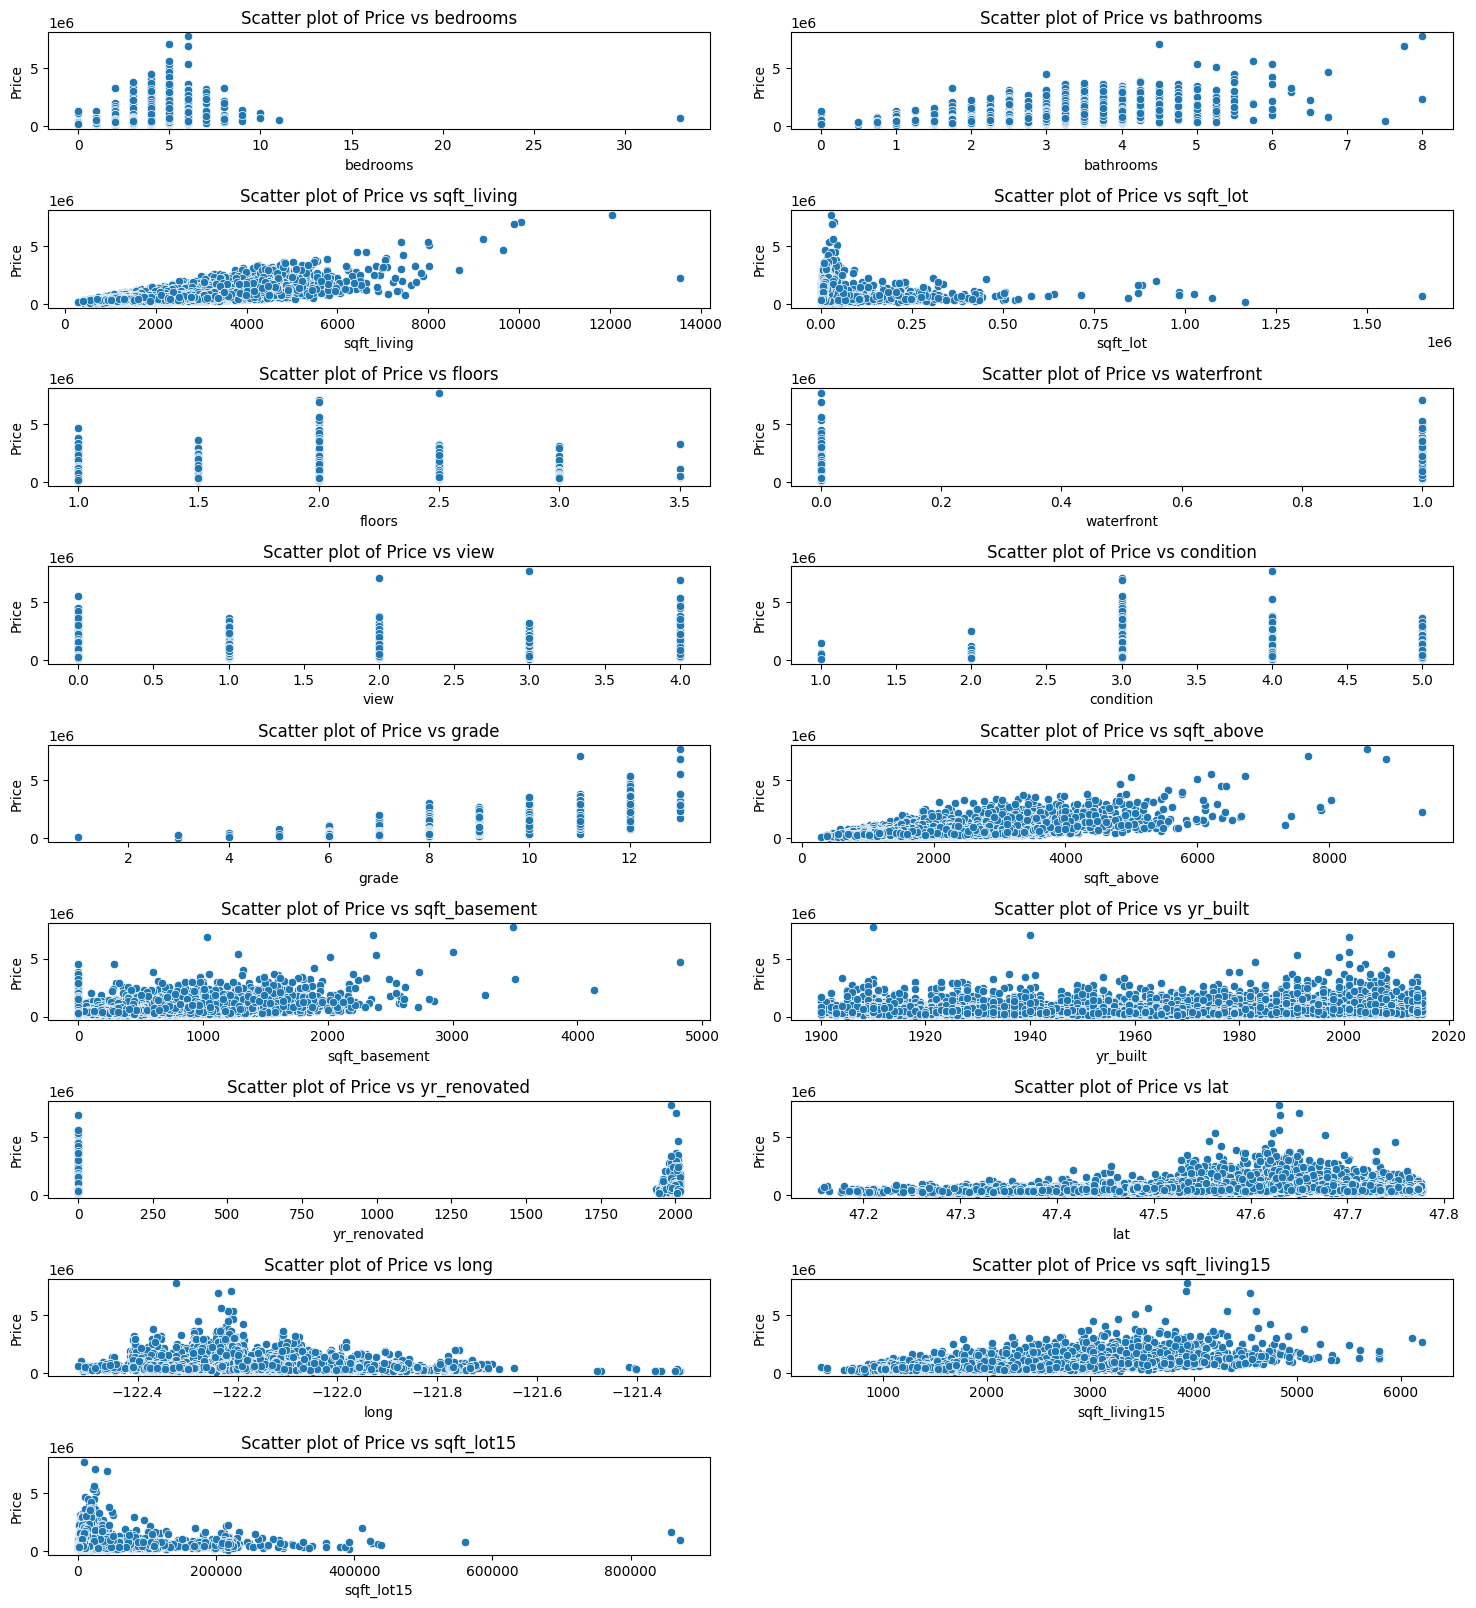

In [16]:
# Filtrar solo las columnas numéricas excluyendo la columna 'price' y otras que no sean necesarias
columns_to_plot = df.select_dtypes(include=['int64', 'float64']).drop(columns=['price'], errors='ignore').columns

# Crear gráficos de dispersión de 'price' vs cada una de las otras columnas numéricas
plt.figure(figsize=(15, 30))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 2, i)
    sns.scatterplot(x=df[column], y=df['price'])
    plt.title(f'Scatter plot of Price vs {column}')
    plt.xlabel(column)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()


# 3.- ENTRENAR MODELOS

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Separar las características (X) y la variable objetivo (y)
X = df.drop(columns=['price'], errors='ignore')
y = df['price']  # Variable objetivo

# 2. Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%) de manera aleatoria
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Aplicar StandardScaler para estandarizar tanto las características como la variable objetivo

# Estandarizar características
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Estandarizar la variable objetivo
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))  # reshape necesario para estandarizar
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Verificar los datos estandarizados
print("Primeros 5 valores de X_train estandarizados:")
print(X_train_scaled[:5])
print("Primeros 5 valores de y_train estandarizados:")
print(y_train_scaled[:5])


Primeros 5 valores de X_train estandarizados:
[[-0.39526335 -0.47445144 -0.32393262 -0.04387306 -0.91959976 -0.08499166
  -0.30591651  0.90907268  1.15024328 -0.00725676 -0.65631017  0.40400107
  -0.20829394 -1.39660754  0.44228847  1.12607326  0.01344043]
 [-1.46896378 -1.45258323 -1.18365301 -0.28577454 -0.91959976 -0.08499166
  -0.30591651 -0.62542567 -1.41315603 -1.20004764 -0.20043274 -1.43056508
  -0.20829394 -0.06017248 -0.53995821 -1.04652268 -0.28066159]
 [-0.39526335 -1.45258323 -1.09547656 -0.18829301  0.00154501 -0.08499166
  -0.30591651 -0.62542567 -1.41315603 -0.96879226 -0.45116533 -0.98891026
  -0.20829394 -0.55284746 -0.86025604 -1.19331971 -0.1789339 ]
 [-0.39526335  0.17763643  0.01775112 -0.18793254 -0.91959976 -0.08499166
  -0.30591651  0.90907268 -0.55868959 -0.61582354  1.18999339  0.20016039
  -0.20829394 -1.19361389  0.29993388 -0.26849846 -0.19528299]
 [-1.46896378  0.50368036 -0.36691864 -0.34399053  0.92268978 -0.08499166
  -0.30591651 -0.62542567  0.2957768

In [19]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# 1. Definir los modelos
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'DecisionTreeRegressor': DecisionTreeRegressor()
}

# 2. Definir los hiperparámetros a probar
param_grid = {
    'Ridge': {'alpha': [0.001, 0.01, 1, 10]},
    'Lasso': {'alpha': [0.001, 0.01, 1, 10]},
    'ElasticNet': {
        'alpha': [0.001, 0.01, 0.1, 1, 10],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
    },
    'DecisionTreeRegressor': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
}

# 3. Realizar validación cruzada para cada modelo
results = {}
for model_name, model in models.items():
    if model_name in param_grid:
        # Realizar GridSearchCV para los modelos con hiperparámetros
        grid = GridSearchCV(model, param_grid[model_name], cv=5, scoring='neg_mean_squared_error')
        grid.fit(X_train, y_train)
        results[model_name] = {
            'best_params': grid.best_params_,
            'best_score': -grid.best_score_  # El MSE se transforma en positivo
        }
    else:
        # Validación cruzada simple para el modelo sin hiperparámetros
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        results[model_name] = {
            'mean_score': -np.mean(scores),  # El MSE en positivo
            'std_score': np.std(scores)
        }

# 4. Mostrar resultados
for model_name, metrics in results.items():
    print(f"Modelo: {model_name}")
    if 'best_params' in metrics:
        print(f"Mejores parámetros: {metrics['best_params']}")
        print(f"Puntuación MSE (mejor): {metrics['best_score']:.2f}")
    else:
        print(f"Puntuación MSE (media): {metrics['mean_score']:.2f} +/- {metrics['std_score']:.2f}")
    print("-" * 40)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.00342e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.11806e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.20517e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.20272e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

Modelo: LinearRegression
Puntuación MSE (media): 40102079470.29 +/- 5512582532.14
----------------------------------------
Modelo: Ridge
Mejores parámetros: {'alpha': 1}
Puntuación MSE (mejor): 40102010147.92
----------------------------------------
Modelo: Lasso
Mejores parámetros: {'alpha': 10}
Puntuación MSE (mejor): 40101794526.24
----------------------------------------
Modelo: ElasticNet
Mejores parámetros: {'alpha': 0.001, 'l1_ratio': 0.9}
Puntuación MSE (mejor): 40102183343.44
----------------------------------------
Modelo: DecisionTreeRegressor
Mejores parámetros: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Puntuación MSE (mejor): 27654172462.93
----------------------------------------


# 4.- Evaluaxión de mejores modelos

In [21]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Definir los mejores hiperparámetros
best_params = {
    'Ridge': {'alpha': 1},
    'Lasso': {'alpha': 10},
    'ElasticNet': {'alpha': 0.001, 'l1_ratio': 0.9},
    'DecisionTreeRegressor': {
        'max_depth': 10,
        'min_samples_split': 10,
        'min_samples_leaf': 4
    }
}

# Inicializar los modelos
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(**best_params['Ridge']),
    'Lasso': Lasso(**best_params['Lasso']),
    'ElasticNet': ElasticNet(**best_params['ElasticNet']),
    'DecisionTreeRegressor': DecisionTreeRegressor(**best_params['DecisionTreeRegressor'])
}

# Inicializar diccionario para almacenar resultados
results_metrics = {}

# Evaluar cada modelo
for model_name, model in models.items():
    # Ajustar el modelo
    model.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular métricas
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Almacenar resultados
    results_metrics[model_name] = {
        'R²': r2,
        'RMSE': rmse,
        'MAPE': mape
    }

# Mostrar resultados
for model_name, metrics in results_metrics.items():
    print(f"Modelo: {model_name}")
    print(f"R²: {metrics['R²']:.4f}")
    print(f"RMSE: {metrics['RMSE']:.2f}")
    print(f"MAPE: {metrics['MAPE']:.2f}%")
    print("-" * 40)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.127e+14, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.434e+14, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


Modelo: LinearRegression
R²: 0.6957
RMSE: 214472.76
MAPE: 25.05%
----------------------------------------
Modelo: Ridge
R²: 0.6957
RMSE: 214494.82
MAPE: 25.05%
----------------------------------------
Modelo: Lasso
R²: 0.6957
RMSE: 214482.38
MAPE: 25.05%
----------------------------------------
Modelo: ElasticNet
R²: 0.6956
RMSE: 214511.49
MAPE: 25.05%
----------------------------------------
Modelo: DecisionTreeRegressor
R²: 0.7881
RMSE: 178971.02
MAPE: 16.82%
----------------------------------------


DecisionTreeRegressor es claramente el mejor modelo en este caso, ya que tiene el valor más alto de
𝑅2
  (0.7881) y el RMSE más bajo (178971.02), así como el MAPE más bajo (16.82%). Esto indica que el modelo está explicando mejor la variabilidad de los precios y tiene un menor error en sus predicciones en comparación con los otros modelos.